In [3]:
# !pip install geopandas

# Import packages

In [1]:

import matplotlib as mpl
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import matplotlib.lines as mlines
import numpy as np


# Import data

In [7]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

shapefile = gpd.read_file(parent_dir + '/Data Input/DuBoisChallenge - Georgia Counties w 1870 & 1880 data.shp')

# Define target projection (e.g., WGS84)
target_crs = 'EPSG:4326'  # WGS84 projection

# Reproject to the target CRS
shapefile = shapefile.to_crs(target_crs)

In [8]:
shapefile.head()

,DECADE,NHGISNAM,NHGISST,NHGISCTY,ICPSRST,ICPSRCTY,ICPSRNAM,STATENAM,ICPSRSTI,ICPSRCTYI,ICPSRFIP,GISJOIN,GISJOIN2,data1870 (,data1880_P,geometry
0,1880,Appling,130,0010,44,10,APPLING,Georgia,44,10,13001.0,G1300010,1300010,> 1000,1000 - 2500,"POLYGON ((-82.04858 31.82707, -82.04877 31.826..."
1,1880,Baker,130,0070,44,70,BAKER,Georgia,44,70,13007.0,G1300070,1300070,2500 - 5000,5000 - 10000,"POLYGON ((-84.50808 31.07840, -84.50808 31.078..."
2,1880,Baldwin,130,0090,44,90,BALDWIN,Georgia,44,90,13009.0,G1300090,1300090,5000 - 10000,5000 - 10000,"POLYGON ((-83.05220 33.08068, -83.05235 33.080..."
3,1880,Banks,130,0110,44,110,BANKS,Georgia,44,110,13011.0,G1300110,1300110,> 1000,1000 - 2500,"POLYGON ((-83.45977 34.48114, -83.45918 34.480..."
4,1880,Bartow,130,0150,44,150,BARTOW,Georgia,44,150,13015.0,G1300150,1300150,2500 - 5000,5000 - 10000,"POLYGON ((-84.65923 34.07800, -84.66166 34.078..."


In [9]:
shapefile["data1870 ("].value_counts()

data1870 (
2500 - 5000      37
5000 - 10000     33
> 1000           32
1000 - 2500      22
10000 - 15000     5
15000 - 20000     2
20000 - 30000     1
Name: count, dtype: int64

# Clean Data

In [10]:
#Relable NAs with 'None'
shapefile["data1870 ("] = shapefile["data1870 ("].fillna('None')
shapefile["data1880_P"] = shapefile["data1880_P"].fillna('None')

#Change labels to match labels in the image
changes = {
    '20000 - 30000': 'BETWEEN 20,000 AND 30,000',
    '15000 - 20000': '15,000 TO 20,000',
    '10000 - 15000': '10,000 TO 15,000',
    '5000 - 10000': '5,000 TO 10,000',
    '2500 - 5000': '2,500 TO 5,000',
    '1000 - 2500': '1,000 TO 2,500',
    '> 1000': 'UNDER 1,000'
}

shapefile["data1870 ("] = shapefile["data1870 ("].replace(changes)
shapefile["data1880_P"] = shapefile["data1880_P"].replace(changes)

# Plot data

C:\Users\olivia.hebner\AppData\Local\Temp\ipykernel_30004\3373687997.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


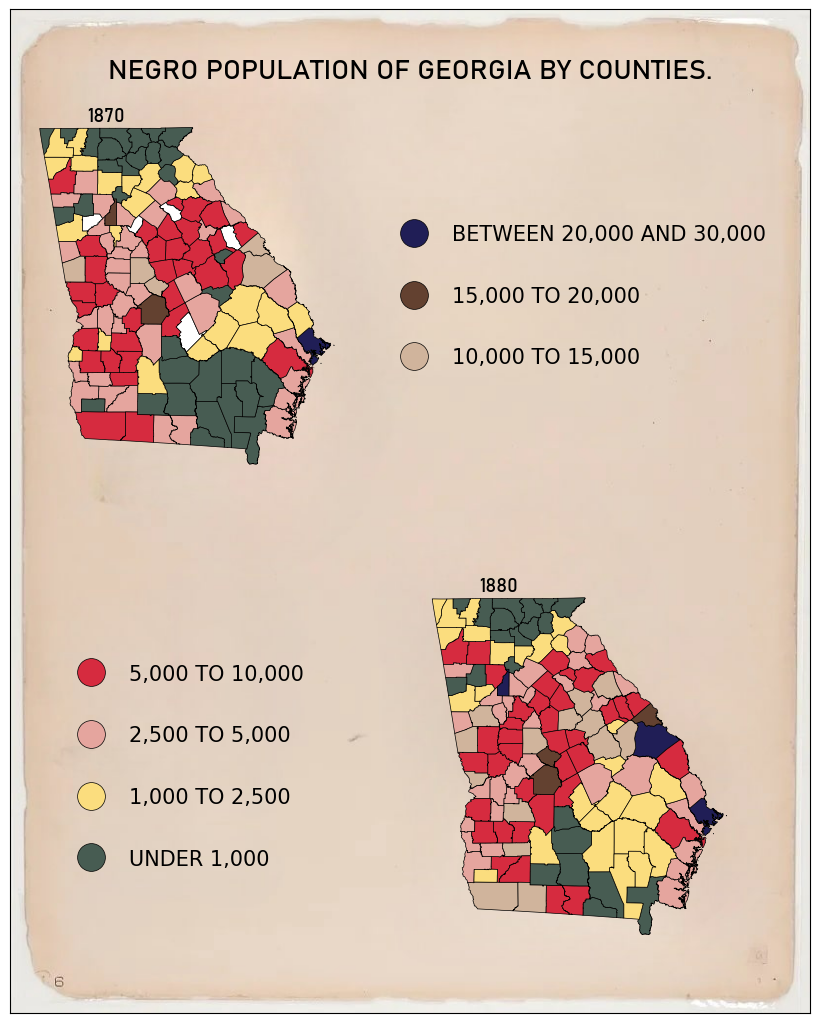

In [26]:
background = plt.imread('C:/Users/olivia.hebner/OneDrive - Summit LLC/GitHub/Du Bois Challenge 2024/Data Input/background_photo.jpg')

width = 8
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(width, width * background.shape[0] / background.shape[1]))

background_ax = plt.axes([0, 0, 1, 1]) # create a dummy subplot for the background
background_ax.set_zorder(-1) # set the background subplot behind the others
background_ax.imshow(background, aspect='auto') # show the backgroud image


duboisPalette = {'BETWEEN 20,000 AND 30,000': '#201E56',
                 '15,000 TO 20,000': '#634130',
                 '10,000 TO 15,000': '#D0B49C',
                 '5,000 TO 10,000': '#D62B3F',
                 '2,500 TO 5,000': '#E5A59E',
                 '1,000 TO 2,500': '#FBDD7E',
                 'UNDER 1,000': '#475C52',
                 'None': '#FFFFFF'
                 }

# Assign a color column based on the categories for each dataset
shapefile['color1870'] = shapefile['data1870 ('].map(duboisPalette)
shapefile['color1880'] = shapefile['data1880_P'].map(duboisPalette)

# Then plot using these color columns
shapefile.plot(ax=ax1, color=shapefile['color1870'], legend=True, edgecolor = 'black', linewidth=0.5)
shapefile.plot(ax=ax4, color=shapefile['color1880'], legend=True, edgecolor = 'black', linewidth=0.5)

font = {'fontname': 'Bahnschrift'}

#fig.suptitle('NEGRO POPULATION OF GEORGIA BY COUNTIES.', **font, fontsize=16, fontweight='bold', y=0.95)
fig.suptitle('NEGRO POPULATION OF GEORGIA BY COUNTIES.', fontsize=20, fontweight='bold', y=0.95, fontname='Bahnschrift')

ax1.set_title('1870', fontsize=14, fontweight='bold', x=.25, y=.95, fontname='Bahnschrift')
ax4.set_title('1880', fontsize=14, fontweight='bold', x=.25, y=.95, fontname='Bahnschrift')

ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
ax4.set_axis_off()

#Create custom legend
handles = [mlines.Line2D([], [], color=color, marker='o', linestyle='None', markersize=20, label=label, markeredgecolor='black', markeredgewidth=0.5) for label, color in duboisPalette.items()]
legend_top_right = handles[0:3]
ax2.legend(handles=legend_top_right, loc='center', frameon=False, fontsize=15, labelspacing=2)

legend_bottom_left = handles[3:7]
ax3.legend(handles=legend_bottom_left, loc='center', frameon=False, fontsize=15, labelspacing=2)

plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
# plt.tight_layout() gives a warning, as the background ax won't be taken into account
plt.tight_layout()

plt.show()

In [ ]:
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='#FBDD7E' 
c2='#F6B311'

gradients = {'#201E56' : '#242B6F', #BETWEEN 20,000 AND 30,000
             '#634130' : '#8E654D', #15,000 TO 20,000
             '#AE9075' : '#CAAE97', #10,000 TO 15,000
             '#DC2943' : '#E64C6B', #5,000 TO 10,000
             '#E79F9C' : '#EBADA5', #2,500 TO 5,000
             '#F6B311' : '#FBDD7E', 
             '#344C3E' : '#566D5E'} #under 1000

n=500

fig, ax = plt.subplots(figsize=(8, 5))
for x in range(n+1):
    ax.axvline(x, color=colorFader(c1,c2,x/n), linewidth=4) 
plt.show()